In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle

In [2]:
import sys
import utilities as ut
from Network import Net
import Network as nn

In [3]:
train_dataset, test_dataset = ut.load_files(dataset=1)
n = 5000#train_dataset.shape[0] 
epsilon = 0.1
input_size = train_dataset.shape[1]-1
hidden_size = 500
hidden_size2 = 500
num_classes = 2
num_epochs = 200
batch_size = 512
learning_rate = 0.001
learning_rate2 = 0.001
regularization = False
add_DR_based_data = True
train_dataset = train_dataset.sample(n)
samples = 5000

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0


In [4]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

In [6]:
train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

(3867, 61)
(28625, 60)
(28625, 61)


In [7]:
train_dataset = ut.sort_columns(train_dataset)
test_dataset = ut.sort_columns(test_dataset)

In [8]:
test_dataset_pred = test_dataset.copy()
train_dataset_pred = train_dataset.copy()

In [9]:
data_prior = ut.generate_samples(samples, train_dataset, epsilon,  option = 2)

In [10]:
train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.1, random_state=42)

In [11]:
train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.1, random_state=42)

In [12]:
_, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
_, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
_, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
_, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
_, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
_, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
_, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

____get_tensor_function____
shape tensor:  torch.Size([9000, 60])
____get_tensor_function____
shape tensor:  torch.Size([1001, 60])
____get_tensor_function____


/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


shape tensor:  torch.Size([3480, 60])
____get_tensor_function____
shape tensor:  torch.Size([3867, 60])
____get_tensor_function____
shape tensor:  torch.Size([1001, 60])
____get_tensor_function____
shape tensor:  torch.Size([22840, 60])
____get_tensor_function____
shape tensor:  torch.Size([22840, 60])


In [13]:
net = Net(input_size, hidden_size, hidden_size2, num_classes)
net.cuda()

Net(
  (fc1): Linear(in_features=60, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=500, out_features=2, bias=True)
)

In [14]:
aux_loss_activated = True
num_epochs_prior = 2000
EPS1 = 1e-3
EPS2 = 1e-6
hist_val, hist_train = nn.train(net, train_loader, train_loader_prior, val_loader, EPS1, EPS2, learning_rate, input_size)

Epochs:  1000
Epoch:  0
training: epoch:  1  loss:  0.6056186727115086
validating: epoch:  1  loss:  0.3900987356901169
Epoch:  1
training: epoch:  2  loss:  0.3636344458375658
validating: epoch:  2  loss:  0.1587795540690422
Epoch:  2
training: epoch:  3  loss:  0.26074259196008953
validating: epoch:  3  loss:  0.05498783476650715
Epoch:  3
training: epoch:  4  loss:  0.25065514019557406
validating: epoch:  4  loss:  0.022031184285879135
Epoch:  4
training: epoch:  5  loss:  0.2539648136922291
validating: epoch:  5  loss:  0.01245771860703826
Epoch:  5
training: epoch:  6  loss:  0.24517051875591278
validating: epoch:  6  loss:  0.009256763849407434
Epoch:  6
training: epoch:  7  loss:  0.23176440596580505
validating: epoch:  7  loss:  0.00772603414952755
Epoch:  7
training: epoch:  8  loss:  0.2208353579044342
validating: epoch:  8  loss:  0.006394692463800311
Epoch:  8
training: epoch:  9  loss:  0.21343425129141128
validating: epoch:  9  loss:  0.004929699236527085
Epoch:  9
traini

training: epoch:  77  loss:  0.08042365206139428
validating: epoch:  77  loss:  8.508227438142058e-06
Epoch:  77
training: epoch:  78  loss:  0.07971007855875152
validating: epoch:  78  loss:  8.50871583679691e-06
Epoch:  78
training: epoch:  79  loss:  0.07900098711252213
validating: epoch:  79  loss:  8.4989642346045e-06
Epoch:  79
training: epoch:  80  loss:  0.0783078106386321
validating: epoch:  80  loss:  8.515541594533715e-06
Epoch:  80
training: epoch:  81  loss:  0.07762588347707476
validating: epoch:  81  loss:  8.537237590644509e-06
Epoch:  81
training: epoch:  82  loss:  0.07695341642413821
validating: epoch:  82  loss:  8.546989192836918e-06
Epoch:  82
training: epoch:  83  loss:  0.07629605276244027
validating: epoch:  83  loss:  8.565029020246584e-06
Epoch:  83
training: epoch:  84  loss:  0.0756440285061087
validating: epoch:  84  loss:  8.587944648752455e-06
Epoch:  84
training: epoch:  85  loss:  0.0750083928661687
validating: epoch:  85  loss:  8.617929779575206e-06


validating: epoch:  152  loss:  1.430048268957762e-05
Epoch:  152
training: epoch:  153  loss:  0.04714222092713628
validating: epoch:  153  loss:  1.4408721654035617e-05
Epoch:  153
training: epoch:  154  loss:  0.0468774964766843
validating: epoch:  154  loss:  1.449014507670654e-05
Epoch:  154
training: epoch:  155  loss:  0.046620583959988186
validating: epoch:  155  loss:  1.4613255189033225e-05
Epoch:  155
training: epoch:  156  loss:  0.046358998332704814
validating: epoch:  156  loss:  1.4685658243251964e-05
Epoch:  156
training: epoch:  157  loss:  0.046104393367256434
validating: epoch:  157  loss:  1.4808279956923798e-05
Epoch:  157
training: epoch:  158  loss:  0.04584908591849463
validating: epoch:  158  loss:  1.4875808119541034e-05
Epoch:  158
training: epoch:  159  loss:  0.04560184638415064
validating: epoch:  159  loss:  1.4988922885095235e-05
Epoch:  159
training: epoch:  160  loss:  0.0453531023647104
validating: epoch:  160  loss:  1.506254466221435e-05
Epoch:  160

training: epoch:  224  loss:  0.03331449148910386
validating: epoch:  224  loss:  1.7723667042446323e-05
Epoch:  224
training: epoch:  225  loss:  0.033164683995502334
validating: epoch:  225  loss:  1.7763890355126932e-05
Epoch:  225
training: epoch:  226  loss:  0.033020940476230214
validating: epoch:  226  loss:  1.7734881112119183e-05
Epoch:  226
training: epoch:  227  loss:  0.03287728716220174
validating: epoch:  227  loss:  1.784263258741703e-05
Epoch:  227
training: epoch:  228  loss:  0.032740089510168345
validating: epoch:  228  loss:  1.7779979316401295e-05
Epoch:  228
training: epoch:  229  loss:  0.03259912372699806
validating: epoch:  229  loss:  1.776705903466791e-05
Epoch:  229
training: epoch:  230  loss:  0.032458932005933354
validating: epoch:  230  loss:  1.7809721612138674e-05
Epoch:  230
training: epoch:  231  loss:  0.03232515017901148
validating: epoch:  231  loss:  1.7807527910917997e-05
Epoch:  231
training: epoch:  232  loss:  0.03218642382749489
validating: 

training: epoch:  295  loss:  0.02529477221625192
validating: epoch:  295  loss:  1.7475740605732426e-05
Epoch:  295
training: epoch:  296  loss:  0.025210215843149593
validating: epoch:  296  loss:  1.7448193830205128e-05
Epoch:  296
training: epoch:  297  loss:  0.025121508166193962
validating: epoch:  297  loss:  1.7433809262001887e-05
Epoch:  297
training: epoch:  298  loss:  0.02503851747938565
validating: epoch:  298  loss:  1.7448681319365278e-05
Epoch:  298
training: epoch:  299  loss:  0.024953369849494526
validating: epoch:  299  loss:  1.7387736079399474e-05
Epoch:  299
training: epoch:  300  loss:  0.02486967747764928
validating: epoch:  300  loss:  1.7379446944687515e-05
Epoch:  300
training: epoch:  301  loss:  0.024786861879484996
validating: epoch:  301  loss:  1.7407481209374964e-05
Epoch:  301
training: epoch:  302  loss:  0.024708191997238567
validating: epoch:  302  loss:  1.7356531316181645e-05
Epoch:  302
training: epoch:  303  loss:  0.024619743494050845
validati

training: epoch:  365  loss:  0.020301489159464836
validating: epoch:  365  loss:  1.7165893950732425e-05
Epoch:  365
training: epoch:  366  loss:  0.02024608850479126
validating: epoch:  366  loss:  1.712542689347174e-05
Epoch:  366
training: epoch:  367  loss:  0.02019367673035179
validating: epoch:  367  loss:  1.6958436390268616e-05
Epoch:  367
training: epoch:  368  loss:  0.020121753348835876
validating: epoch:  368  loss:  1.7101780031225644e-05
Epoch:  368
training: epoch:  369  loss:  0.0200832656451634
validating: epoch:  369  loss:  1.693576450634282e-05
Epoch:  369
training: epoch:  370  loss:  0.020011226380509988
validating: epoch:  370  loss:  1.6958923879428767e-05
Epoch:  370
training: epoch:  371  loss:  0.019960695079394748
validating: epoch:  371  loss:  1.6884569049580023e-05
Epoch:  371
training: epoch:  372  loss:  0.019904105258839472
validating: epoch:  372  loss:  1.6905290976865217e-05
Epoch:  372
training: epoch:  373  loss:  0.019851704527224814
validating:

training: epoch:  436  loss:  0.016694498115352223
validating: epoch:  436  loss:  1.5056693882797845e-05
Epoch:  436
training: epoch:  437  loss:  0.01664392663432019
validating: epoch:  437  loss:  1.5032803275971673e-05
Epoch:  437
training: epoch:  438  loss:  0.016606015286275318
validating: epoch:  438  loss:  1.4964057299948763e-05
Epoch:  438
training: epoch:  439  loss:  0.016559830999800136
validating: epoch:  439  loss:  1.4878976799082011e-05
Epoch:  439
training: epoch:  440  loss:  0.01652132799582822
validating: epoch:  440  loss:  1.4789508895773906e-05
Epoch:  440
training: epoch:  441  loss:  0.01647094983075346
validating: epoch:  441  loss:  1.4768056644243188e-05
Epoch:  441
training: epoch:  442  loss:  0.01643514327172722
validating: epoch:  442  loss:  1.4723687854711898e-05
Epoch:  442
training: epoch:  443  loss:  0.016393753167773997
validating: epoch:  443  loss:  1.4635438674304169e-05
Epoch:  443
training: epoch:  444  loss:  0.016345977650157044
validatin

training: epoch:  508  loss:  0.013872208605919565
validating: epoch:  508  loss:  1.0429715985083021e-05
Epoch:  508
training: epoch:  509  loss:  0.01383962415690933
validating: epoch:  509  loss:  1.032123327604495e-05
Epoch:  509
training: epoch:  510  loss:  0.013796493943248476
validating: epoch:  510  loss:  1.0282227776770014e-05
Epoch:  510
training: epoch:  511  loss:  0.013763692096940108
validating: epoch:  511  loss:  1.0190809916821308e-05
Epoch:  511
training: epoch:  512  loss:  0.013727016347859586
validating: epoch:  512  loss:  1.0159117664443329e-05
Epoch:  512
training: epoch:  513  loss:  0.01369162555783987
validating: epoch:  513  loss:  1.0116699741047341e-05
Epoch:  513
training: epoch:  514  loss:  0.013656291445451123
validating: epoch:  514  loss:  1.0134008334716782e-05
Epoch:  514
training: epoch:  515  loss:  0.013633730289127146
validating: epoch:  515  loss:  9.973599844670389e-06
Epoch:  515
training: epoch:  516  loss:  0.01358275315059083
validating

training: epoch:  579  loss:  0.01169184029900602
validating: epoch:  579  loss:  6.490933628811035e-06
Epoch:  579
training: epoch:  580  loss:  0.011666174312787396
validating: epoch:  580  loss:  6.479232069978025e-06
Epoch:  580
training: epoch:  581  loss:  0.011635125149041414
validating: epoch:  581  loss:  6.399759058695054e-06
Epoch:  581
training: epoch:  582  loss:  0.011616842754717385
validating: epoch:  582  loss:  6.3510028667224105e-06
Epoch:  582
training: epoch:  583  loss:  0.01158548379316926
validating: epoch:  583  loss:  6.337595095828874e-06
Epoch:  583
training: epoch:  584  loss:  0.011555701893355166
validating: epoch:  584  loss:  6.316629878710955e-06
Epoch:  584
training: epoch:  585  loss:  0.011536008013146264
validating: epoch:  585  loss:  6.211559593793936e-06
Epoch:  585
training: epoch:  586  loss:  0.011509025336376258
validating: epoch:  586  loss:  6.182549896038836e-06
Epoch:  586
training: epoch:  587  loss:  0.011477793034698282
validating: ep

training: epoch:  651  loss:  0.009990390190588576
validating: epoch:  651  loss:  3.7903191696386784e-06
Epoch:  651
training: epoch:  652  loss:  0.009976403122501714
validating: epoch:  652  loss:  3.7259605960571207e-06
Epoch:  652
training: epoch:  653  loss:  0.009948095107184989
validating: epoch:  653  loss:  3.6884182463836623e-06
Epoch:  653
training: epoch:  654  loss:  0.00993503290893776
validating: epoch:  654  loss:  3.682323722387082e-06
Epoch:  654
training: epoch:  655  loss:  0.009907821326383523
validating: epoch:  655  loss:  3.6662340789916925e-06
Epoch:  655
training: epoch:  656  loss:  0.009888243196266038
validating: epoch:  656  loss:  3.57871658707154e-06
Epoch:  656
training: epoch:  657  loss:  0.009871639577405793
validating: epoch:  657  loss:  3.543124421412358e-06
Epoch:  657
training: epoch:  658  loss:  0.009847517590969801
validating: epoch:  658  loss:  3.5516566185833653e-06
Epoch:  658
training: epoch:  659  loss:  0.009827931943748678
validating

training: epoch:  721  loss:  0.008618548379412718
validating: epoch:  721  loss:  2.442693357807002e-06
Epoch:  721
training: epoch:  722  loss:  0.008598589604454381
validating: epoch:  722  loss:  2.4448875137750292e-06
Epoch:  722
training: epoch:  723  loss:  0.00858821380617363
validating: epoch:  723  loss:  2.4229470909631345e-06
Epoch:  723
training: epoch:  724  loss:  0.008571971008288009
validating: epoch:  724  loss:  2.40100666815124e-06
Epoch:  724
training: epoch:  725  loss:  0.008546344204140561
validating: epoch:  725  loss:  2.3905240595922805e-06
Epoch:  725
training: epoch:  726  loss:  0.008525586753551449
validating: epoch:  726  loss:  2.3910117761261063e-06
Epoch:  726
training: epoch:  727  loss:  0.008514968678355217
validating: epoch:  727  loss:  2.3724842321826145e-06
Epoch:  727
training: epoch:  728  loss:  0.008495313381510121
validating: epoch:  728  loss:  2.3712652819085633e-06
Epoch:  728
training: epoch:  729  loss:  0.008470478600689344
validatin

training: epoch:  791  loss:  0.007482622417488268
validating: epoch:  791  loss:  1.7354824422000092e-06
Epoch:  791
training: epoch:  792  loss:  0.0074759726079979116
validating: epoch:  792  loss:  1.7228057913598605e-06
Epoch:  792
training: epoch:  793  loss:  0.007461864201884184
validating: epoch:  793  loss:  1.7035470136761433e-06
Epoch:  793
training: epoch:  794  loss:  0.007441422303340265
validating: epoch:  794  loss:  1.7079350982385222e-06
Epoch:  794
training: epoch:  795  loss:  0.007429192308336496
validating: epoch:  795  loss:  1.6920893131100456e-06
Epoch:  795
training: epoch:  796  loss:  0.007417396475960102
validating: epoch:  796  loss:  1.6789250594229088e-06
Epoch:  796
training: epoch:  797  loss:  0.007405568180339677
validating: epoch:  797  loss:  1.6628355297143571e-06
Epoch:  797
training: epoch:  798  loss:  0.007383308373391628
validating: epoch:  798  loss:  1.6655170611556969e-06
Epoch:  798
training: epoch:  799  loss:  0.007369904546067119
vali

training: epoch:  861  loss:  0.006527096897895847
validating: epoch:  861  loss:  1.049480601977848e-06
Epoch:  861
training: epoch:  862  loss:  0.006517983440841947
validating: epoch:  862  loss:  1.0470427014297456e-06
Epoch:  862
training: epoch:  863  loss:  0.00650693938535239
validating: epoch:  863  loss:  1.0389979934188887e-06
Epoch:  863
training: epoch:  864  loss:  0.006496101052367261
validating: epoch:  864  loss:  1.022664605443424e-06
Epoch:  864
training: epoch:  865  loss:  0.006482264093522515
validating: epoch:  865  loss:  1.0173013151870691e-06
Epoch:  865
training: epoch:  866  loss:  0.0064650295368794885
validating: epoch:  866  loss:  1.0148635283258045e-06
Epoch:  866
training: epoch:  867  loss:  0.006456131381647927
validating: epoch:  867  loss:  1.0053560117739835e-06
Epoch:  867
training: epoch:  868  loss:  0.006445458424942834
validating: epoch:  868  loss:  1.0034058277597069e-06
Epoch:  868
training: epoch:  869  loss:  0.006433426369247692
validat

training: epoch:  932  loss:  0.005734934571332165
validating: epoch:  932  loss:  6.491908948191849e-07
Epoch:  932
training: epoch:  933  loss:  0.005720072825040136
validating: epoch:  933  loss:  6.44559008833312e-07
Epoch:  933
training: epoch:  934  loss:  0.005709373558472309
validating: epoch:  934  loss:  6.433401154026797e-07
Epoch:  934
training: epoch:  935  loss:  0.0057022923803223035
validating: epoch:  935  loss:  6.338325988508586e-07
Epoch:  935
training: epoch:  936  loss:  0.005694261818592038
validating: epoch:  936  loss:  6.253002879930136e-07
Epoch:  936
training: epoch:  937  loss:  0.005681024265608617
validating: epoch:  937  loss:  6.213997494342038e-07
Epoch:  937
training: epoch:  938  loss:  0.005668399922017541
validating: epoch:  938  loss:  6.228624442883302e-07
Epoch:  938
training: epoch:  939  loss:  0.0056585339563233516
validating: epoch:  939  loss:  6.245689405659505e-07
Epoch:  939
training: epoch:  940  loss:  0.005648480162822774
validating: 

In [15]:
#plt.plot(aux_loss_behaviour)
#plt.show()

In [16]:
nn.get_results(net, train_loader, input_size)
nn.get_results(net, test_loader, input_size)

Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 81 %
81


array(81)

In [17]:
torch.save(net.state_dict(), 'model.pkl')

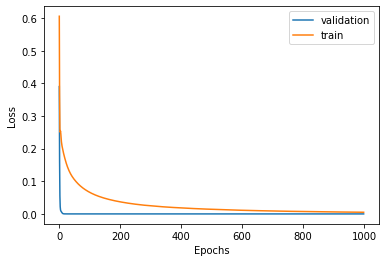

In [18]:
plt.plot(hist_val, label ='validation')
plt.plot(hist_train, label ='train')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('images/'+str(samples)+'_'+str(epsilon)+'_'+str(n)+"_"+str(hidden_size)+"_Loss_Training.png")
plt.show()

In [19]:
#csv_file = open("size_MLP_noise.csv", "a")
#csv_file.write(str(np.asarray(acc_testing))+","+str(np.asarray(acc_training))+","+str(samples)+","+str(epsilon)+","+str(n)+","+str(hidden_size)+"\n")
#csv_file.close()

In [20]:
outputs, intermediates, intermediates2, labels = ut.get_representations(net, train_loader, device)
outputs_test, intermediates_test, intermediates2_test, labels_test = ut.get_representations(net, test_loader, device)

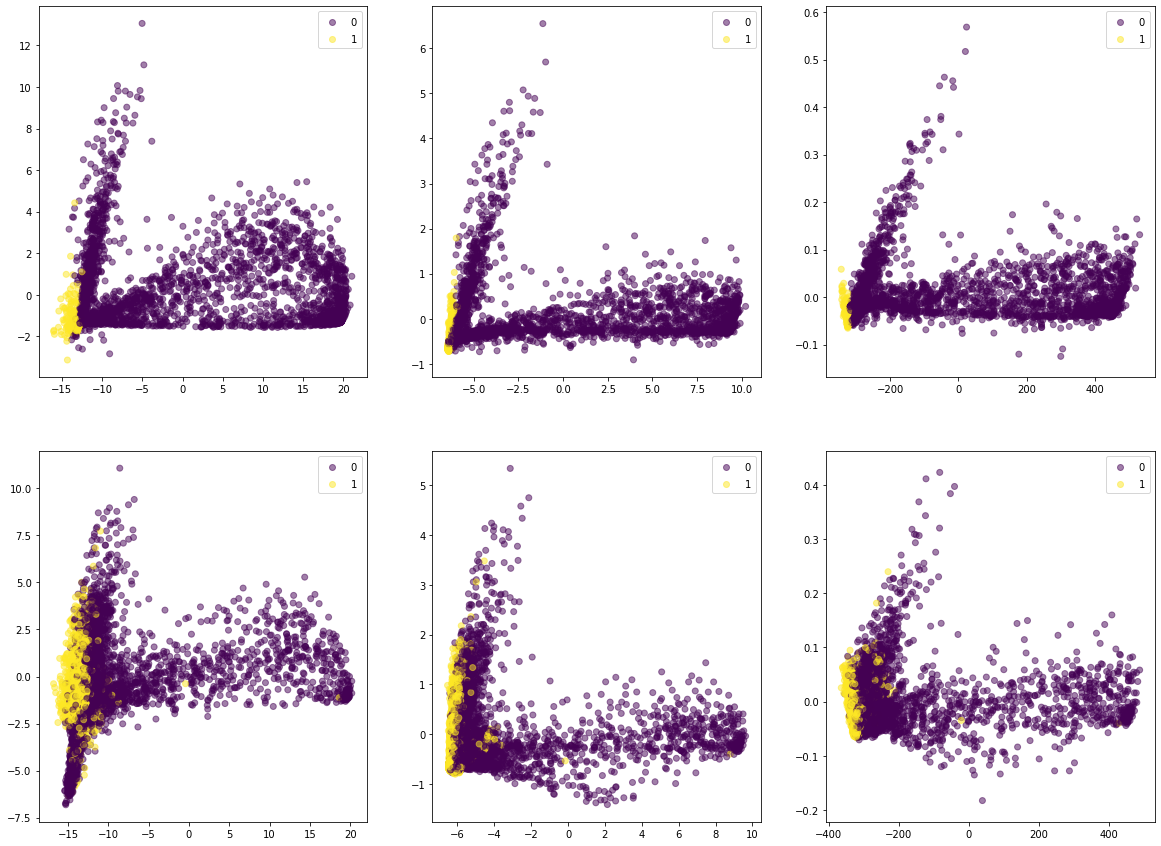

In [21]:
intermediate_pca_data, intermediate_pca_data_test = ut.get_pca(intermediates, data_test=intermediates_test)
fig, axs = plt.subplots(2, 3, figsize=(20,15))
ut.plot_representations(intermediate_pca_data, labels, axs[0, 0])
ut.plot_representations(intermediate_pca_data_test, labels_test, axs[1, 0])
intermediate2_pca_data, intermediate2_pca_data_test = ut.get_pca(intermediates2, data_test=intermediates2_test)
ut.plot_representations(intermediate2_pca_data, labels, axs[0, 1])
ut.plot_representations(intermediate2_pca_data_test, labels_test, axs[1, 1])
output_pca_data, output_pca_data_test = ut.get_pca(outputs, data_test=outputs_test)
ut.plot_representations(output_pca_data, labels, axs[0, 2])
ut.plot_representations(output_pca_data_test, labels_test, axs[1, 2])

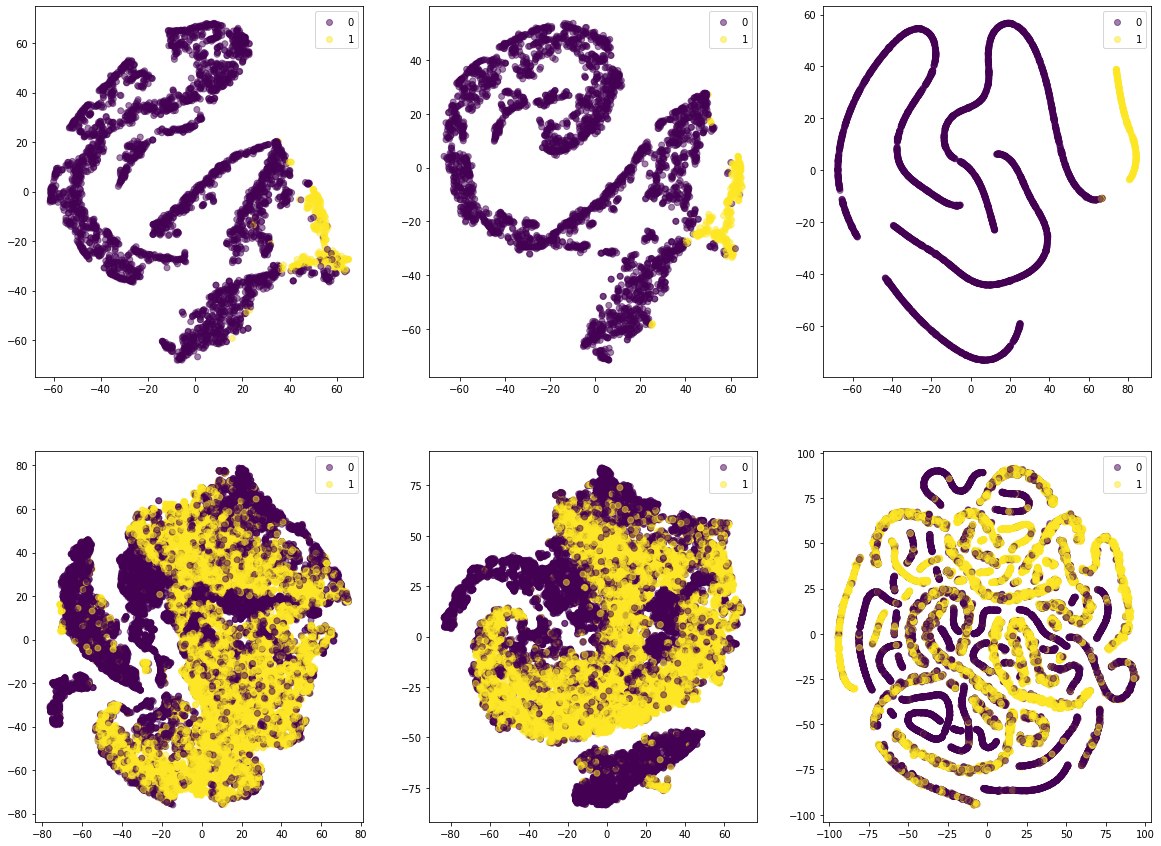

In [22]:
N_CURVES = 25000

fig, axs = plt.subplots(2, 3, figsize=(20,15))
intermediate_tsne_data, intermediate_tsne_data_test = ut.get_tsne(intermediates, data_test= intermediates_test, n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data, labels, axs[0, 0],  n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data_test, labels_test, axs[1, 0], n_curves = N_CURVES)

intermediate2_tsne_data, intermediate2_tsne_data_test = ut.get_tsne(intermediates2, data_test=intermediates2_test, n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data, labels, axs[0, 1], n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data_test, labels_test, axs[1, 1], n_curves = N_CURVES)

output_tsne_data, output2_tsne_data_test = ut.get_tsne(outputs, data_test=outputs_test, n_curves = N_CURVES)
ut.plot_representations(output_tsne_data, labels, axs[0, 2], n_curves = N_CURVES)
ut.plot_representations(output2_tsne_data_test, labels_test, axs[1, 2], n_curves = N_CURVES)

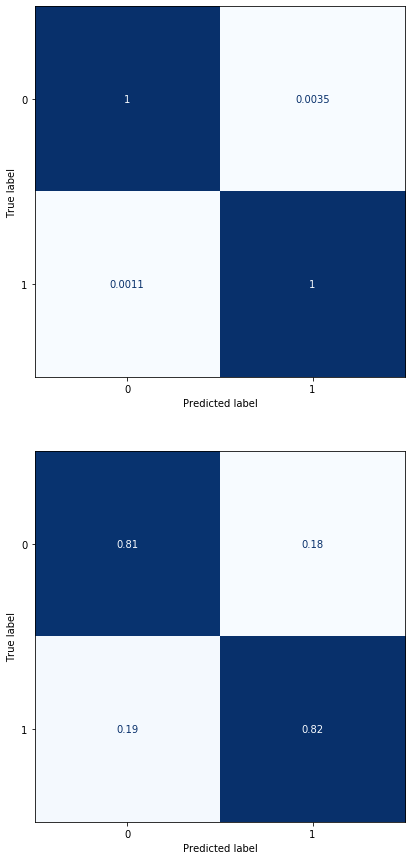

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
pred_labels = probs_train.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax1)
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = probs_test.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax2)

In [24]:
curves, labels, probs_train_sample = ut.get_predictions(net, train_loader, device)

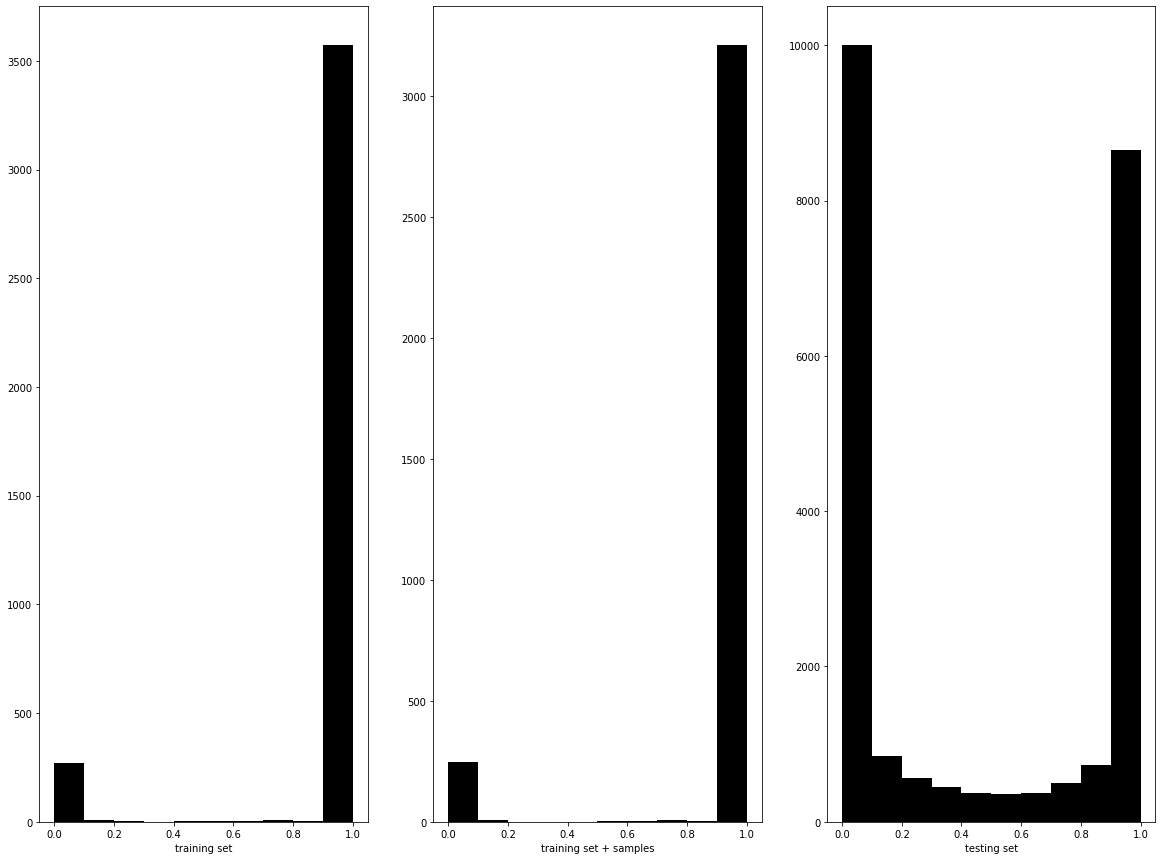

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(probs_train[:,0], color='black')
ax1.set_xlabel('training set')
ax2.hist(probs_train_sample[:,0], color='black')
ax2.set_xlabel('training set + samples')
ax3.hist(probs_test[:,0], color='black')
ax3.set_xlabel('testing set')
plt.show()

In [26]:
#N_WEIGHTS = 25
#weights = net.fc2.weight.data
#plot_weights(weights, N_WEIGHTS)

In [27]:
weights1 = net.fc1.weight.data
w1 = weights1.cpu().numpy().reshape(-1,1)
weights2 = net.fc2.weight.data
w2 = weights2.cpu().numpy().reshape(-1,1)
weights3 = net.fc3.weight.data
w3 = weights3.cpu().numpy().reshape(-1,1)

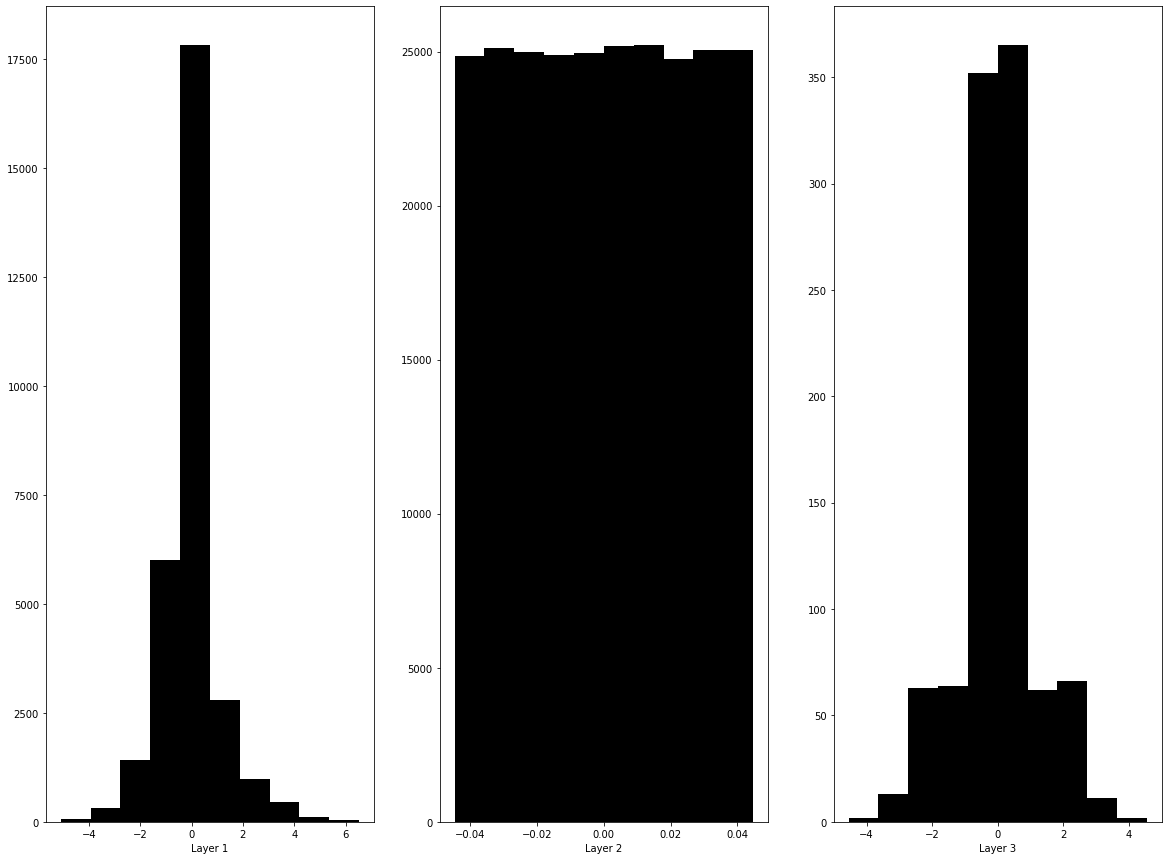

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(w1, color='black')
ax1.set_xlabel('Layer 1')
ax2.hist(w2, color='black')
ax2.set_xlabel('Layer 2')
ax3.hist(w3, color='black')
ax3.set_xlabel('Layer 3')
plt.show()